In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC #Support Vector Classifier

In [2]:
df = pd.read_csv('SVM_Data.csv')

In [5]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

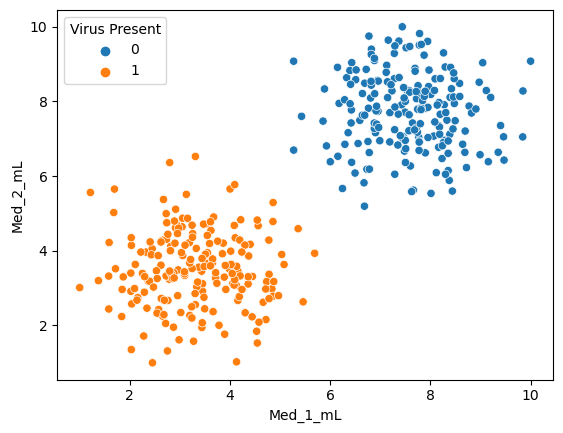

In [9]:
sns.scatterplot(x = 'Med_1_mL', y = 'Med_2_mL', hue = 'Virus Present', data = df)

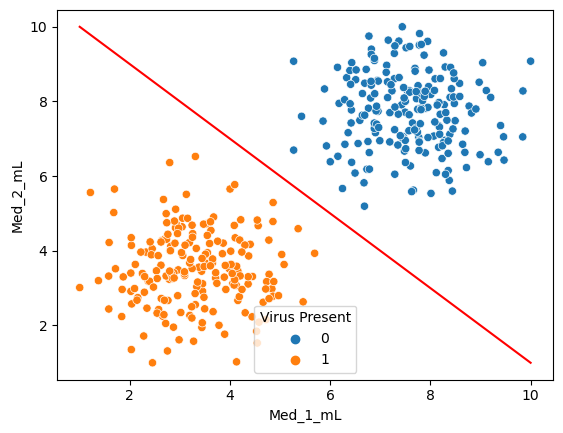

In [11]:
sns.scatterplot(x = 'Med_1_mL', y = 'Med_2_mL', hue = 'Virus Present', data = df)
x = np.linspace(1,10, 100)
b = 11
m = -1
y = m * x + b

plt.plot(x, y, color = 'red')

In [13]:
#split data into features, label
x = df.drop(['Virus Present'], axis = 1)
y = df['Virus Present']

In [14]:
model = SVC(kernel = 'linear')

In [15]:
#fit model 
model.fit(x,y)

SVC(kernel='linear')

In [17]:
from mlxtend.plotting import plot_decision_regions

D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

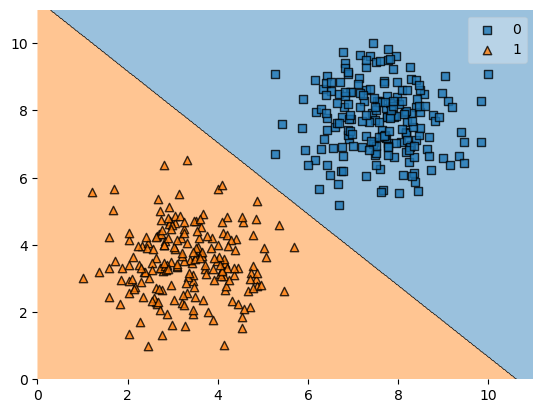

In [20]:
x = np.array(x)
y = np.array(y)
plot_decision_regions(x,y, clf = model)

In [23]:
poly_model = SVC(kernel = 'poly', degree = 2)
poly_model.fit(x,y)

SVC(degree=2, kernel='poly')

<Axes: >

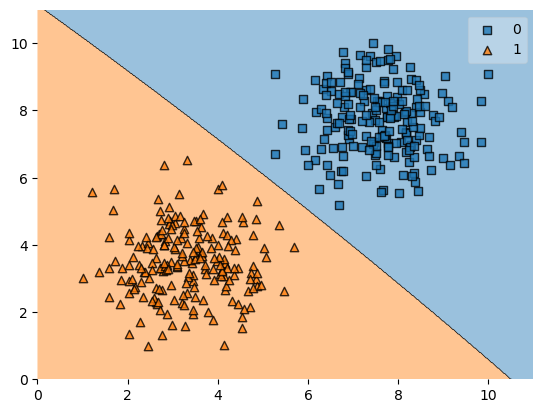

In [24]:
x = np.array(x)
y = np.array(y)
plot_decision_regions(x,y, clf = poly_model)

In [25]:
rbf_model = SVC(kernel = 'rbf', gamma = 0.1)
rbf_model.fit(x,y)

SVC(gamma=0.1)

<Axes: >

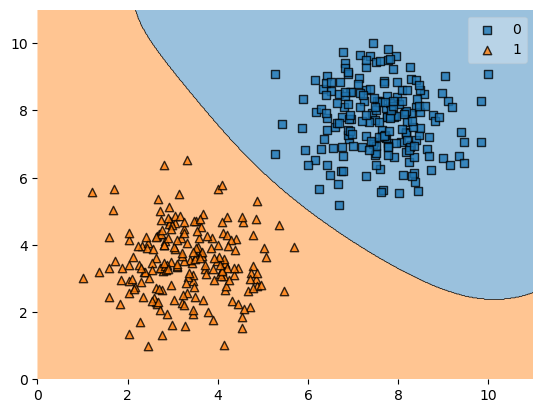

In [26]:
plot_decision_regions(x,y, clf = rbf_model)

### **Grid Search**

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
model = SVC()

In [29]:
#svc model parameters
params = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'C' :[0.1, 0.01, 1],
    'gamma' : [0.1, 0.01, 1]
}

In [30]:
#grid search model (model name, parameters)
gs_model = GridSearchCV(model, params)

In [31]:
gs_model.fit(x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 1], 'gamma': [0.1, 0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [33]:
gs_model.best_estimator_

SVC(C=0.1, gamma=0.1, kernel='linear')

In [35]:
model = SVC(C=0.1, gamma=0.1, kernel='linear')

In [36]:
model.fit(x,y)

SVC(C=0.1, gamma=0.1, kernel='linear')

<Axes: >

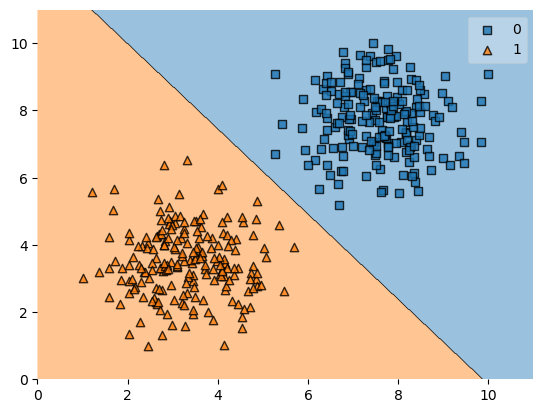

In [37]:
plot_decision_regions(x,y, clf = model)

## **Example 2**

In [ ]:
1- read data
2- explore data
3- data preprocessing:
    - split data x,y (class)
    - encoding
    - split data into train, test
4- logistic regression
5- evaluate logistic regression
6- svm model
7- evaluate svm
8- grid search on svm (kernel, c, gamma)

In [38]:
df = pd.read_csv('mushrooms.csv')

In [39]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [41]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [43]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [44]:
#split data into features and label
x = df.drop(['class'], axis = 1) #features
y = df['class'] #label

In [45]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [46]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
encoder = LabelEncoder()

In [49]:
#fit LabelEncoder on y
y = encoder.fit_transform(y)

In [50]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [52]:
x.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [53]:
#fit LabelEncoder on x
for col in x.columns:
    x[col] = encoder.fit_transform(x[col])

In [54]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [55]:
# split data into train, test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, shuffle = True,
                                                   random_state = 1)

In [56]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)

x_train shape (5686, 22)
y_train shape (5686,)


In [57]:
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_test shape (2438, 22)
y_test shape (2438,)


In [61]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [62]:
lr_model = LogisticRegression()

In [63]:
#fit LogisticRegression on train data (x_train, y_train)
lr_model.fit(x_train, y_train)

LogisticRegression()

In [64]:
lr_pred = lr_model.predict(x_test)

In [65]:
lr_pred

array([0, 0, 1, ..., 0, 0, 1])

In [66]:
y_test

array([0, 1, 1, ..., 1, 0, 1])

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred)

0.9499589827727646

In [69]:
svm_model = SVC()
#fit svm_model on train data (x_train, y_train)
svm_model.fit(x_train, y_train)
#predict
svm_pred = svm_model.predict(x_test)
accuracy_score(y_test, svm_pred)

0.9864643150123051

In [71]:
svm_model = SVC()

In [70]:
params = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'C' : [0.1, 0.01, 1],
    'gamma' : [0.1, 0.01, 1]
}

In [72]:
gs_model = GridSearchCV(svm_model, params)

In [73]:
gs_model.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 1], 'gamma': [0.1, 0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [74]:
gs_model.best_estimator_

SVC(C=0.1, gamma=0.1, kernel='poly')

In [76]:
model = SVC(C = 0.1, gamma = 0.1, kernel = 'poly')

In [77]:
model.fit(x_train, y_train)

SVC(C=0.1, gamma=0.1, kernel='poly')

In [78]:
y_pred = model.predict(x_test)

In [79]:
accuracy_score(y_test, y_pred)

1.0

In [ ]:
1- decision tree
2- random forest 
3- xgboost 